## FINAL PROJECT
PROJECT PURPOSE: This project was implemented as a requirement to complete a Python course organized by Digitalent Kominfo
AUTHOR: Albert Parlys Tambunan
CLASS: PYT4-8


How to Run this Dev  

> jupyter notebook

## Latar Belakang

Marves Core adalah plikasi support pekerjaan di lingkup Kemenko Marves yang di-develop dan maintain secara in-house. User dapat melakukan presensi, membuat agenda, mencatat logbook, serta melihat hak keuangan Pribadi.  


Proses Deployment aplikasi dilakukan secara berkala. Seiring perkembangan teknologi, library yang digunakan, serta keamanan dalam Sistem Informasi, membuat pengelola aplikasi harus selalu memperhatikan versi OS serta pengembangan Versi aplikasi.


Saat ini pengelola melakukan query setiap periode untuk melihat sebaran jumlah user berdasarkan Versi OS dan Versi applikasi yang berjalan di perangkatnya.  

Sehingga proyek ini diharapkan dapat mempermudah pengelola untuk dapat mengalisa user, sebelum melakukan deployment aplikasi. Pengelola dapat menentukan apakah perlu adanya strategi untuk meningkatkan minimum OS support, atau melakukan notifikasi kepada user.  


## Scope Tech Stack:  
Python 3.10  
Pipenv  
Jupyter notebook  
Pandas  
Numpy  
Matplotlib  
Seaborn  
Pandas_dataclasses  
Typing  


## Scope Analysis:  
Android users  
Based only on sessions data  


## Algoritma
1. Extract data csv User_data dan Session_data
1. Data cleaning:
    - Filter perangkat Android only
    - Filter session yang aktif
    - Filter session user pada tahun ini
    - Join table session dengan User
1. Data Analisis
    - Plot sebaran os_version
    - Plot sebaran app_version
    - Plot sebaran app_version x os_version
1. Hasil Analisa
    - Jumlah user yang perlu update OS / upgrade perangkat
    - Jumlah user yang perlu update appversion
    - Jumlah user yang sudah compatible namun belum melakukan update app


## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from dataclasses import dataclass
from typing import Any, Annotated as Ann, Literal as L
from pandas_dataclasses import AsDataFrame, Data, Index


## Data Preparation

### Define dataclasses

In [2]:
@dataclass
class User(AsDataFrame):
    id: Index[str]
    created_at: Data[L["datetime64[ns]"]]
    created_by: Data[str]
    updated_at: Data[L["datetime64[ns]"]]
    updated_by: Data[str]
    email: Data[str]
    is_ldap_user: Data[bool]
    status: Data[str]
    is_deleted: Data[bool]


@dataclass
class UserSession(AsDataFrame):
    id: Data[str]
    created_at: Data[L["datetime64[ns]"]]
    created_by: Data[str]
    updated_at: Data[L["datetime64[ns]"]]
    updated_by: Data[str]
    last_used: Data[L["datetime64[ns]"]]
    status: Data[str]
    type: Data[str]
    user_id: Data[str]
    android_id: Data[str]
    app_build: Data[str]
    app_name: Data[str]
    app_package: Data[str]
    app_version: Data[str]
    device_brand: Data[str]
    device_id: Data[str]
    device_manufacturer: Data[str]
    device_model: Data[str]
    device_name: Data[str]
    os_version: Data[str]
    is_deleted: Data[bool]


## Define function to extract data
Data to extract:  
1. Users data  
2. Session data

In [3]:
def extract_user_data():
    """
    User csv will be read then change data types of two attributes:
    1. created_at --> datetime
    2. updated_at --> datetime
    """
    filename = "../asset/users_okay_to_publish.csv"
    with open(filename) as users_csv:
        user_df = pd.read_csv(users_csv)
        user_df['created_at'] = pd.to_datetime(user_df['created_at'])
        user_df['updated_at'] = pd.to_datetime(user_df['updated_at'])
        users_obj = [User(**kwargs) for kwargs in user_df.to_dict(orient='records')]
        return users_obj

def extract_session_data():
    """
    Session csv will be read then change data types of two attributes:
    1. created_at --> datetime
    2. updated_at --> datetime
    3. last_used --> datetime
    """
    filename = "../asset/sessions_okay_to_publish.csv"
    with open(filename) as users_csv:
        session_df = pd.read_csv(users_csv)
        session_df['created_at'] = pd.to_datetime(session_df['created_at'])
        session_df['updated_at'] = pd.to_datetime(session_df['updated_at'])
        session_df['last_used'] = pd.to_datetime(session_df['last_used'])
        sessions_obj = [UserSession(**kwargs) for kwargs in session_df.to_dict(orient='records')]
        return sessions_obj

### Data Cleaning

Data analysis requirement:  
1. Session:
    - only "VALID" status
    - only android device
    - only session on this year
1. User:
    - only user with android session available



Step 1: Define data to be use

In [4]:
session_data = pd.DataFrame(extract_session_data())
user_data = pd.DataFrame(extract_user_data())

Step 2: filter: only session on this year 

In [5]:
# recent only (this year session data)
today_datetime = datetime.datetime.today()
today_datetime.strftime("%Y%m%d")
filtered_datetime = datetime.datetime(day=1,month=1,year=today_datetime.year)


print(f"program will filter session data from {today_datetime.strftime('%Y/%m/%d')} to {filtered_datetime.strftime('%Y/%m/%d')}\n")

filtered_session_data_step_2 = session_data.query(f'last_used > {filtered_datetime.strftime("%Y%m%d")}')

print(f"data shape comparisson: \n\tbefore: ")
print(f"\t\tsession_df shape: {session_data.shape}")
print(f"\tafter: ")
print(f"\t\tfiltered_sesion_df shape: {filtered_session_data_step_2.shape}")

program will filter session data from 2022/10/19 to 2022/01/01

data shape comparisson: 
	before: 
		session_df shape: (7897, 21)
	after: 
		filtered_sesion_df shape: (3883, 21)


Step 3: filter: only "valid" status

In [6]:

print(f"program will filter session data to VALID only\n")

filtered_session_data_step_3 = filtered_session_data_step_2.drop(filtered_session_data_step_2[filtered_session_data_step_2['status'] != 'VALID'].index)
print(f"data shape comparisson: \n\tbefore: ")
print(f"\t\tfiltered_session_data_step_2 shape: {filtered_session_data_step_2.shape}")
print(f"\tafter: ")
print(f"\t\tfiltered_session_data_step_3 shape: {filtered_session_data_step_3.shape}")

program will filter session data to VALID only

data shape comparisson: 
	before: 
		filtered_session_data_step_2 shape: (3883, 21)
	after: 
		filtered_session_data_step_3 shape: (766, 21)


Step 4: filter: only android

In [7]:
# dev config
# pd.options.display.max_rows=100

print(f"program will filter session data to Android devices only\n")

filtered_session_data_step_4 = filtered_session_data_step_3.dropna(subset=["os_version"])
filtered_session_data_step_4 = filtered_session_data_step_4.drop(filtered_session_data_step_4[filtered_session_data_step_4['device_model'] == 'iPhone'].index)
filtered_session_data_step_4 = filtered_session_data_step_4.drop(filtered_session_data_step_4[filtered_session_data_step_4['device_model'] == 'iPad'].index)
print(f"data shape comparisson: \n\tbefore: ")
print(f"\t\tfiltered_session_data_step_3 shape: {filtered_session_data_step_3.shape}")
print(f"\tafter: ")
print(f"\t\tfiltered_session_data_step_4 shape: {filtered_session_data_step_4.shape}")


program will filter session data to Android devices only

data shape comparisson: 
	before: 
		filtered_session_data_step_3 shape: (766, 21)
	after: 
		filtered_session_data_step_4 shape: (578, 21)


Step 5: join session data to user data

In [8]:
print(f"program will join table user data and filtered sesion data\n")

filtered_session_data_step_5 = user_data.join(filtered_session_data_step_4.set_index('user_id'),on='id',rsuffix='_session')
print(f"data shape comparisson: \n\tbefore: ")
print(f"\t\tuser_data shape: {user_data.shape}")
print(f"\t\tfiltered_session_data_step_4 shape: {filtered_session_data_step_4.shape}")
print(f"\tafter: ")
print(f"\t\tfiltered_session_data_step_5 shape: {filtered_session_data_step_5.shape}")

program will join table user data and filtered sesion data

data shape comparisson: 
	before: 
		user_data shape: (837, 9)
		filtered_session_data_step_4 shape: (578, 21)
	after: 
		filtered_session_data_step_5 shape: (837, 29)


Step 6: filter: only android users

In [9]:
print(f"program will filter data to user with android device only\n")


filtered_session_data_step_6= filtered_session_data_step_5.drop_duplicates(subset=['id'])
filtered_session_data_step_6 = filtered_session_data_step_6.dropna(subset='os_version')


# Check no null data
check_null_1 = filtered_session_data_step_6[['os_version']].isnull().sum()
print(f"check no null data on os_version")
print(f"\t{check_null_1}\n")

check_null_2 = filtered_session_data_step_6[['app_version']].isnull().sum()
print(f"check no null data on app_version")
print(f"\t{check_null_2}\n")

print(f"data shape comparisson: \n\tbefore: ")
print(f"\t\tfiltered_session_data_step_5 shape: {filtered_session_data_step_5.shape}")
print(f"\tafter: ")
print(f"\t\tfiltered_session_data_step_6 shape: {filtered_session_data_step_6.shape}")

program will filter data to user with android device only

check no null data on os_version
	os_version    0
dtype: int64

check no null data on app_version
	app_version    0
dtype: int64

data shape comparisson: 
	before: 
		filtered_session_data_step_5 shape: (837, 29)
	after: 
		filtered_session_data_step_6 shape: (578, 29)


Step 7: Data Cleaning completed

In [10]:
data_checkpoint_cleaned = filtered_session_data_step_6

## Data Analysis  

Data analysis:  
1. Application currently on app_version: 210 and support minimum os_version: 24
2. Android oldest os_version that still maintained is os_version: 29
3. Latest app security patch in on app_version: 200
4. To increase minimun os_version we need to know how many users use os_version below 29
5. To maintain app security integrity we need know how many users use app_version below 200
6. To ensure user experience we need to know how many users that available to upgrade app_version within supported os_version

Expected Result:
1. Graph that shows os_version distribution on users
2. Graph that shows app_version distribution on users
3. Graph that shows os_version x app_version distribution on users


![Android Version History](../asset/android_version_history.jpeg)

Step 1: Graph that shows os_version distribution on users

In [11]:
android_by_os_version = data_checkpoint_cleaned.groupby(['os_version'])['os_version'].count().reset_index(name='jumlah')
android_by_os_version = android_by_os_version.astype({'os_version': int})

display(android_by_os_version)

,os_version,jumlah
0,24,1
1,25,7
2,26,8
3,27,26
4,28,52
5,29,106
6,30,171
7,31,202
8,32,4
9,33,1


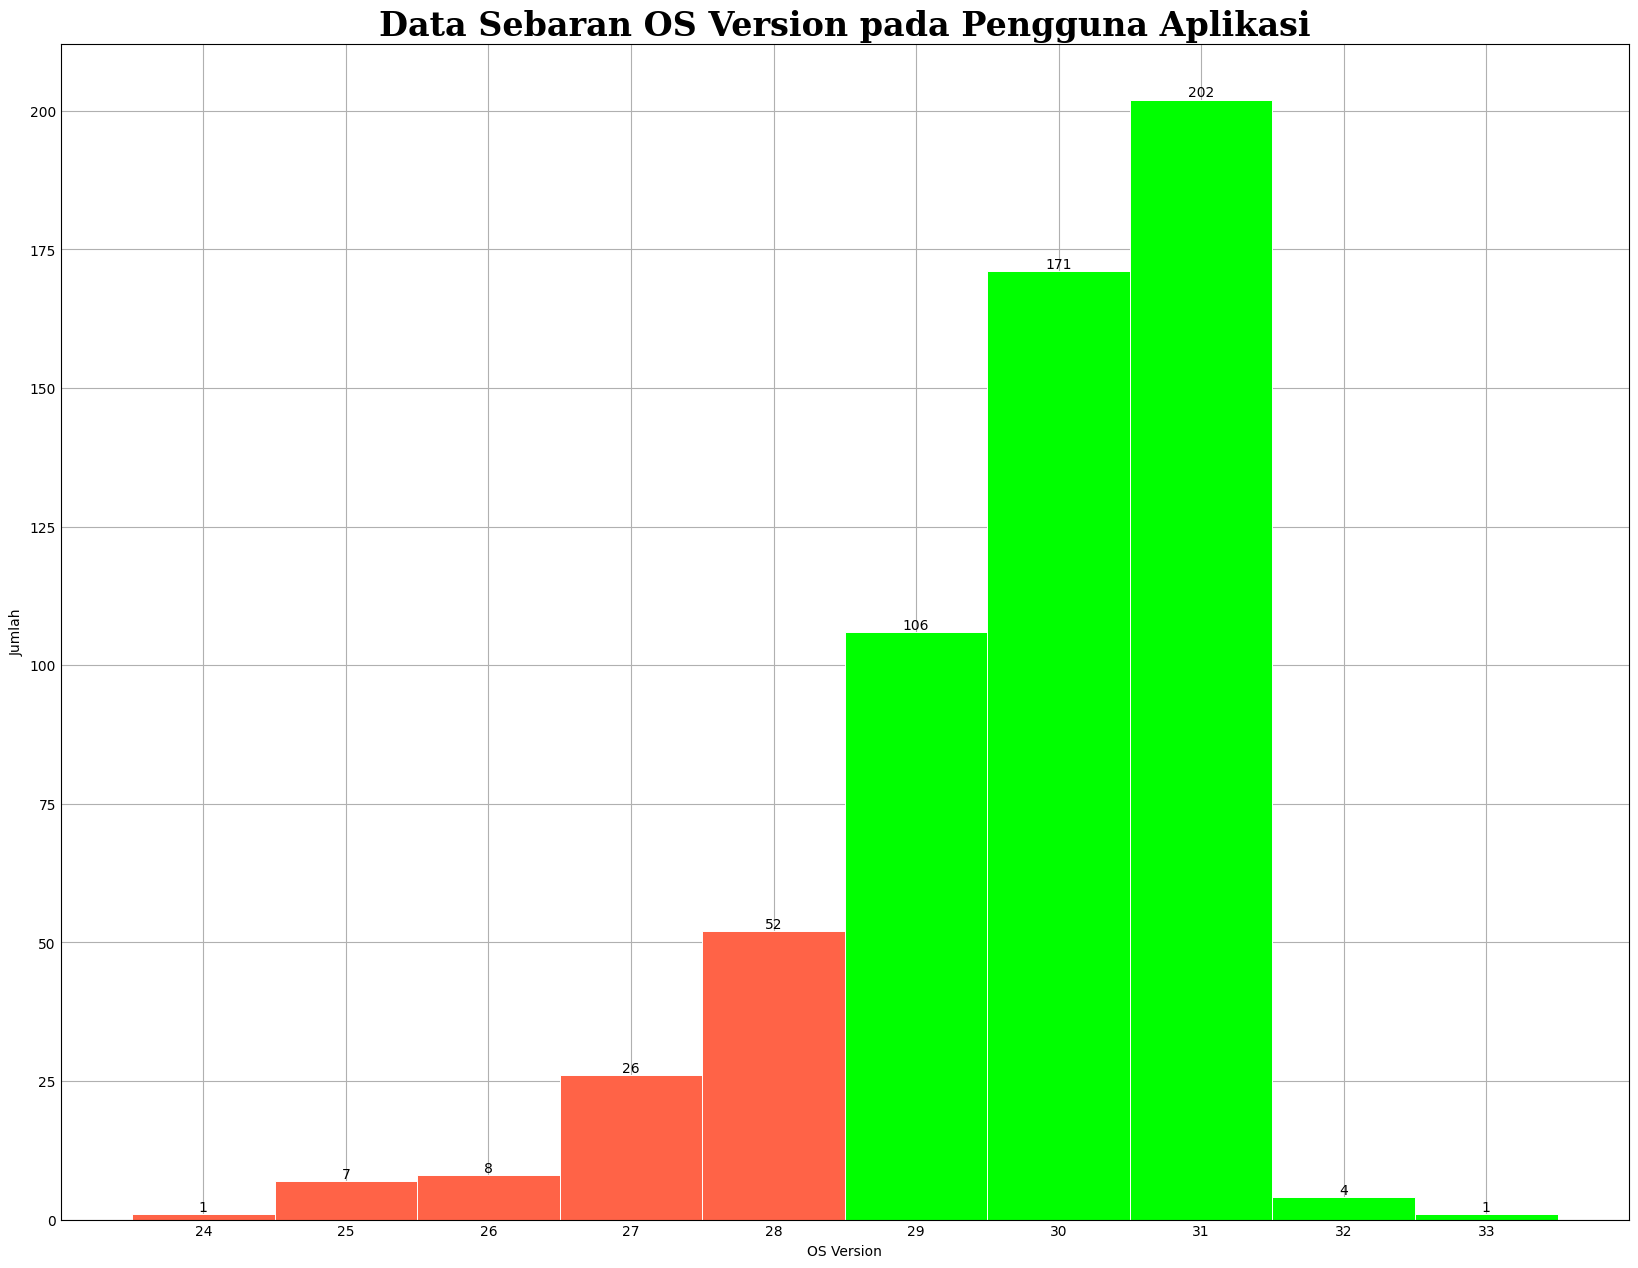

In [26]:
# plot configuration
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 24,
        }
colors = ['tomato','tomato','tomato','tomato','tomato','lime','lime','lime','lime','lime']
plt.style.use('_mpl-gallery')
x = android_by_os_version.os_version
y = android_by_os_version.jumlah

fig, ax = plt.subplots(figsize=(16, 12),)

p1= ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7,label=y, color=colors)
ax.set(xlim=(x.min()-1, x.max()+1),xticks=np.arange(x.min(), x.max()+1))
ax.bar_label(p1)
plt.xlabel("OS Version")
plt.ylabel("Jumlah")
plt.title("Data Sebaran OS Version pada Pengguna Aplikasi",fontdict=font)

# save fig
plt.savefig('../target/graph_1_osversion.png',dpi=300, bbox_inches = "tight")

plt.show()



In [13]:
user_under_expected_os_version = android_by_os_version[android_by_os_version['os_version'] < 29].sum().jumlah
total_users = android_by_os_version['jumlah'].sum()
print(f"total user under os_version: 29 is \n{user_under_expected_os_version} ({(user_under_expected_os_version/total_users)*100:.2f}%)\n(val,(pct))")

total user under os_version: 29 is 
94 (16.26%)
(val,(pct))


Step 2: Graph that shows app_version distribution on users

In [29]:
android_by_app_version = data_checkpoint_cleaned.groupby(['app_version'])['app_version'].count().reset_index(name='jumlah')
 
android_by_app_version = android_by_app_version.astype({'app_version': int})
android_by_app_version = android_by_app_version.astype({'app_version': str})

display(android_by_app_version)

,app_version,jumlah
0,102,6
1,103,40
2,104,2
3,105,5
4,106,4
5,107,4
6,108,4
7,109,14
8,120,7
9,130,4


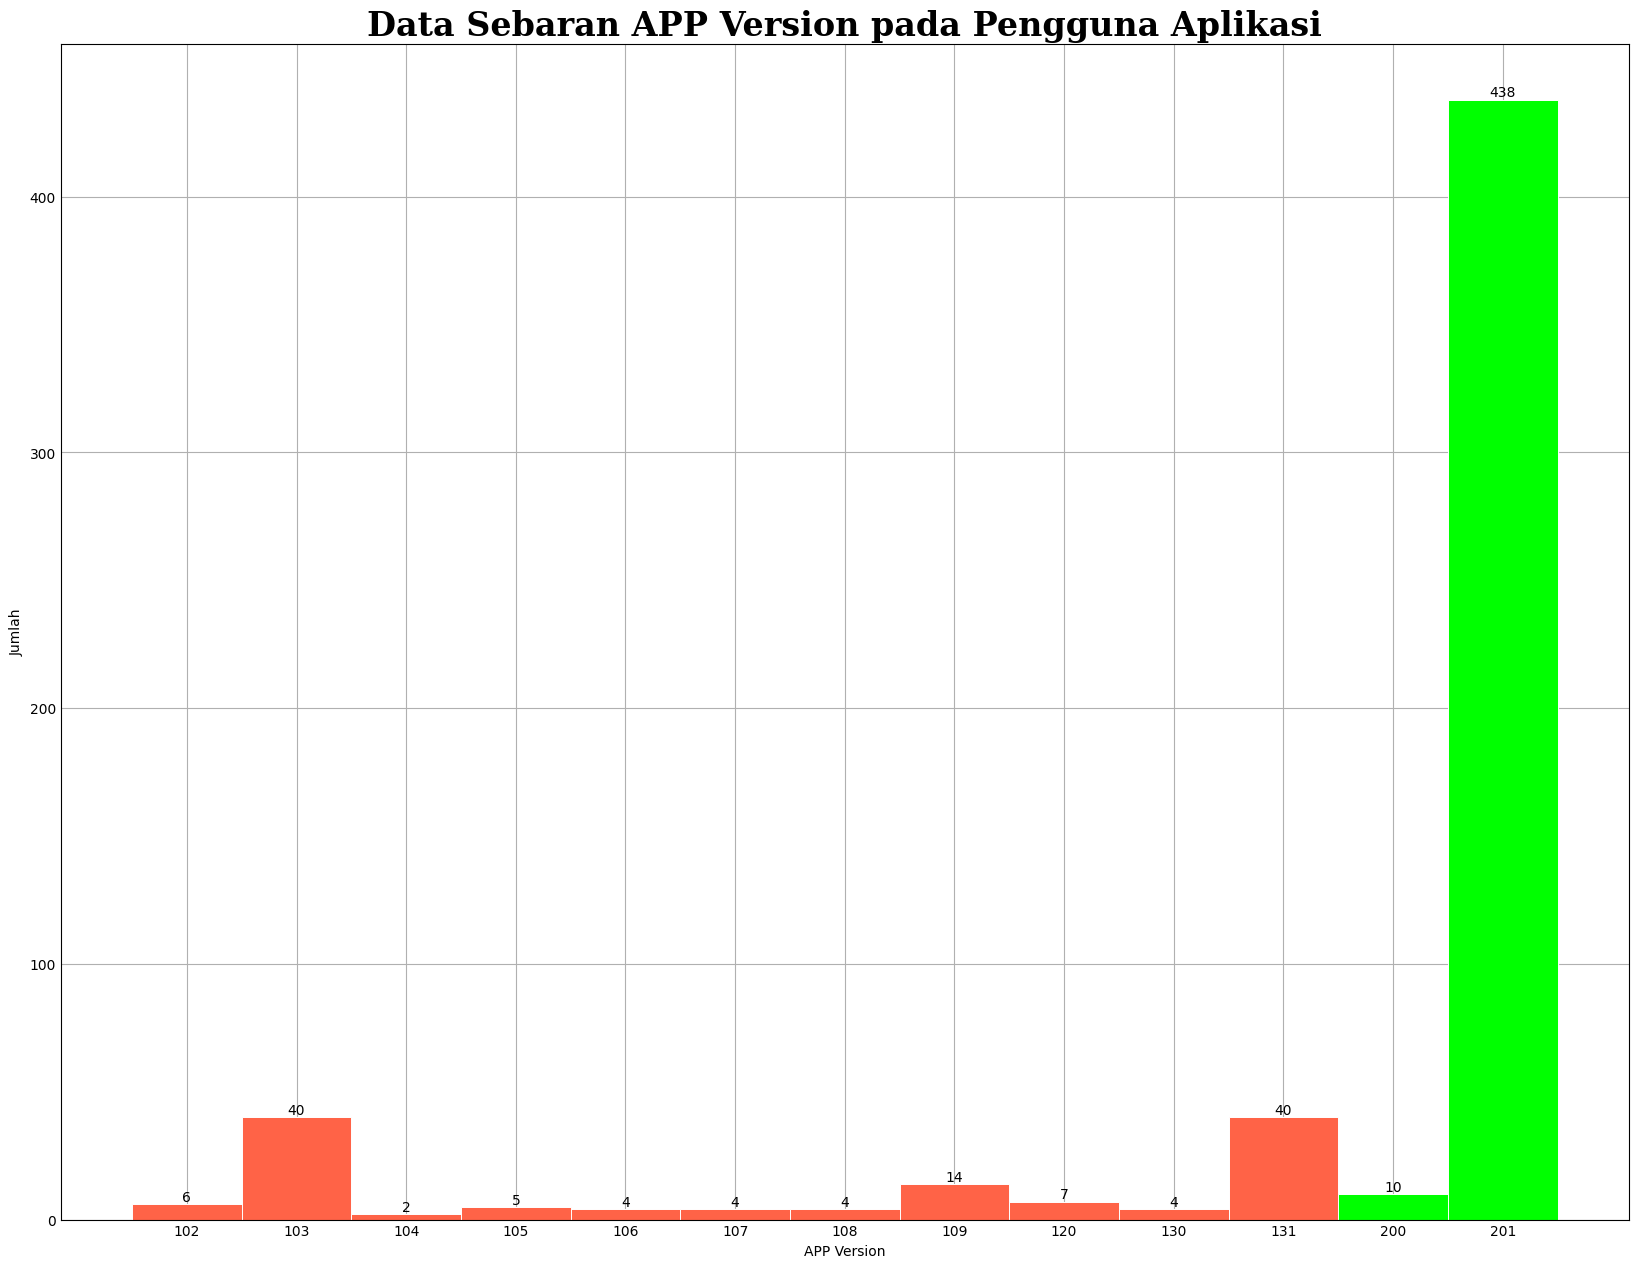

In [30]:
# plot configuration
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 24,
        }
colors = ['tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','tomato','lime','lime']

plt.style.use('_mpl-gallery')
x = android_by_app_version.app_version
y = android_by_app_version.jumlah


fig, ax = plt.subplots(figsize=(16, 12),)
width=1
p1= ax.bar(x, y,width=width , edgecolor="white", linewidth=0.7,label=y, color=colors)
ax.bar_label(p1)
plt.xlabel("APP Version")
plt.ylabel("Jumlah")
plt.title("Data Sebaran APP Version pada Pengguna Aplikasi",fontdict=font)

# save fig
plt.savefig('../target/graph_2_appversion',dpi=300, bbox_inches = "tight")

plt.show()


In [16]:
user_under_expected_app_version = android_by_app_version[android_by_app_version['app_version'] < 200].sum().jumlah
total_users = android_by_app_version['jumlah'].sum()
print(f"total user under app_version: 200 is \n{user_under_expected_app_version} ({(user_under_expected_app_version/total_users)*100:.2f}%)\n(val,(pct))")

total user under app_version: 200 is 
130 (22.49%)
(val,(pct))


Step 3: Graph that shows os_version x app_version distribution on users

In [32]:
android_by_version_and_app_version = data_checkpoint_cleaned.groupby(['os_version','app_version'])['os_version'].count().reset_index(name='jumlah')
android_by_version_and_app_version = android_by_version_and_app_version.astype({'app_version': int, 'os_version': int})
android_by_version_and_app_version = android_by_version_and_app_version.astype({'app_version': str, 'os_version': str})

display(android_by_version_and_app_version)

,os_version,app_version,jumlah
0,24,201,1
1,25,103,2
2,25,106,1
3,25,201,4
4,26,103,1
5,26,107,1
6,26,201,6
7,27,103,8
8,27,104,1
9,27,109,1


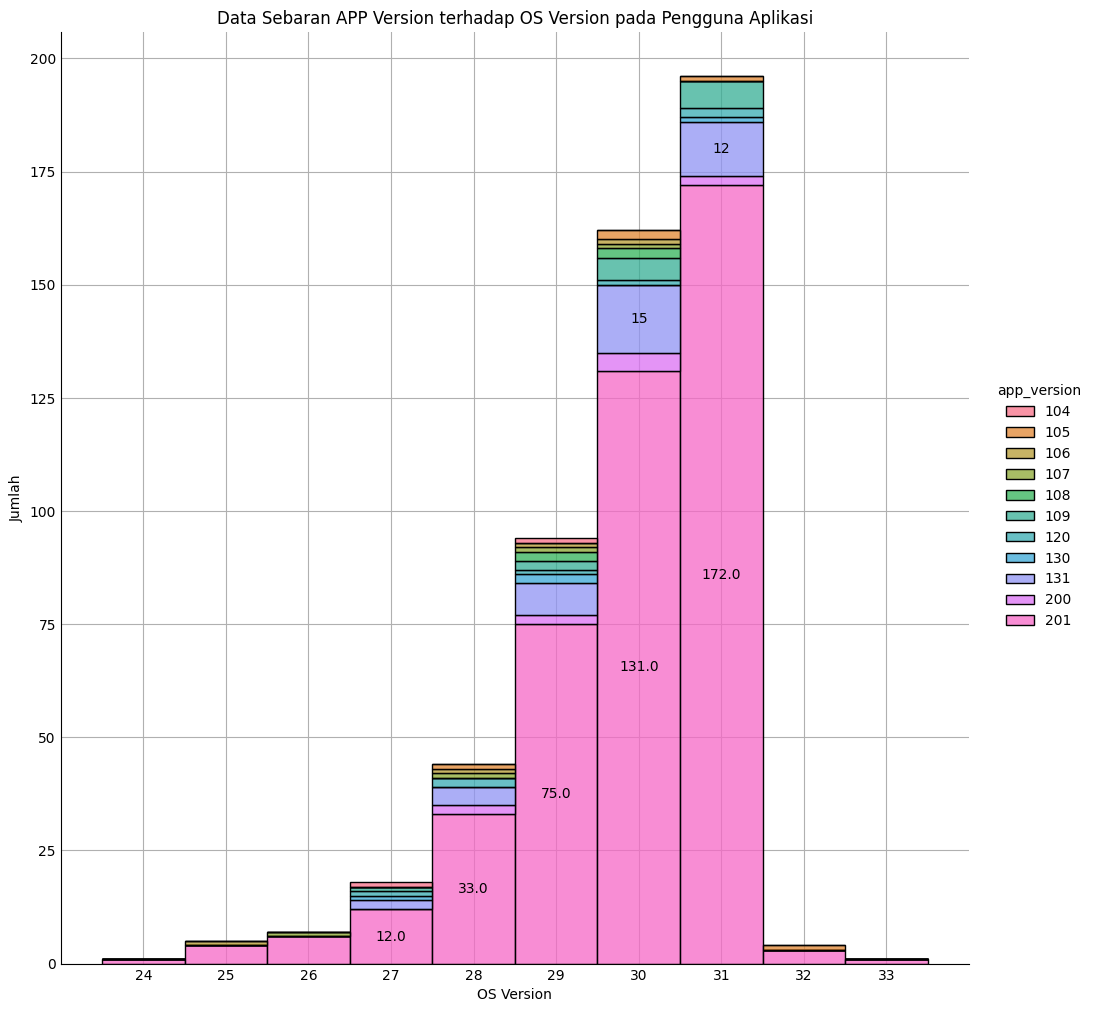

In [33]:
data = android_by_version_and_app_version
labels_unique = data.app_version.unique()
labels_unique = labels_unique.astype(int)
labels_unique  =np.msort(labels_unique)

# plot
hue_order = ['104', '105', '106', '107', '108', '109','120','130','131','200','201']
g = sns.displot(data=data, x='os_version', hue='app_version', weights='jumlah', discrete=True, multiple='stack', height=10, hue_order=hue_order)
min_height = 10

# iterate through each axes
for ax in g.axes.flat:

    # iterate through each container
    for c in ax.containers:

        # Optional: if the segment is small or 0, customize the labels
        labels = [v.get_height() if v.get_height() > min_height else '' for v in c]

        # remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=labels, label_type='center')
ax.set_ylabel('Jumlah')
ax.set_xlabel('OS Version')
ax.set_title('Data Sebaran APP Version terhadap OS Version pada Pengguna Aplikasi')

# save fig
plt.savefig('../target/graph_3_appversion_vs_os_version',dpi=300, bbox_inches = "tight")

plt.show()


In [34]:
# user_under_expected refer to user_under_expected_app_version_by_compatible_os_version
android_by_version_and_app_version = android_by_version_and_app_version.astype({'app_version': int, 'os_version': int})
user_under_expected = android_by_version_and_app_version[(android_by_version_and_app_version['app_version'] < 200) & (android_by_version_and_app_version['os_version'] >= 29)].sum().jumlah
total_users = android_by_version_and_app_version['jumlah'].sum()
print(f"total user under app_version: 200 but compatible above os_version: 29 is \n{user_under_expected} ({(user_under_expected/total_users)*100:.2f}%)\n(val,(pct))")

total user under app_version: 200 but compatible above os_version: 29 is 
94 (16.26%)
(val,(pct))


## Kesimpulan


    - Jumlah user yang perlu update OS / upgrade perangkat
        total user under os_version: 29 is 
        94 (16.26%)
        (val,(pct))
    - Jumlah user yang perlu update appversion
        total user under app_version: 200 is 
        130 (22.49%)
        (val,(pct))
    - Jumlah user yang sudah compatible namun belum melakukan update app
        total user under app_version: 200 but compatible above os_version: 29 is 
        94 (16.26%)
        (val,(pct))